<a href="https://colab.research.google.com/github/rharkovsky/pucCienciadeDados/blob/main/MVP1_Harkovsky3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise Exploratória de Dados 

## ROBERTO HARKOVSKY

### Base Netflix Originals

## 1. Definição do Problema

O dataset usado neste projeto será o NetflixOriginals, proveniente originalmente do Kagle. Este dataset consiste em todos os filmes originais da Netflix lançados em 1º de junho de 2021. Além disso, também inclui todos os documentários e especiais da Netflix. Seu objetivo é apresentar as características do filme e sua classificação IMDB que mede a receptividade do público. O score do IMDB são obtidos através de votação dos membros da comunidade. Além disto a maioria dos filmes tem mais de 1.000 críticas. 

As possiveis variáveis preditoras nesta análise incluem Genre, Premiere, Runtime e linguagem. A variável alvo é o IMDB Score

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores 


**Informações sobre os atributos originais:**

1.	Title - Título do filme
2.	Genre - Gênero do filme
3.	Premiere - Data de estreia do filme original
4.	Runtime - Tempo de execução do filme em minutos
5.	IMDB Score - Pontuações do IMDB (a partir de 01/06/21) que indicam a aceitação do público para o produto Original lançado
6.	Language - Linguagem na qual o filme foi produzido (a partir de 01/06/21)


## 2. Carga de dados
Nesta primeira etapa será feita a importação dos pacotes necessários a análise. Em seguida ocorre a carga do dataset


### Importando Biliotecas

In [2]:
# imports
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

### Funções úteis para impressão de gráficos 

In [3]:
# Gráficos de Dispersão e densidade
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # mantendo somente atriutos numéricos
    # removendo linhas e colunas não singulares
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # mantendo colunas onde houver mais de 1 valor exclusivo
    columnNames = list(df)
    if len(columnNames) > 10: # reduzindo número de colunas para inversão de matriz de gráficos de densidade
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Gráficos de Dispersão e densidade')
    plt.show()

### *Preparando o Dataset*

In [4]:
# conexão com GDrive
from google.colab import drive
drive.mount('/content/gdrive')

# url a importar
arquivo = "NetflixOriginals.csv"
url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo


# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


Para uma melhor documentação decidi alterar os nomes das variaveis para Portugues

In [5]:
# Aproveitando a alteração para traduzir as colunas 
ds.rename(columns= {'Title' : 'Titulo'}, inplace= True)
ds.rename(columns= {'Genre' : 'Genero'}, inplace= True)
ds.rename(columns= {'Runtime' : 'Duracao'}, inplace= True)
ds.rename(columns= {'Language' : 'Linguagem'}, inplace= True)
ds.rename(columns= {'IMDB Score' : 'IMDB'}, inplace= True)

# exibe as 5 primeiras linhas
ds.head()

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## 3. Análise Exploratória de Dados
Nesta etapa será realizada uma primeira análise das variaveis do dataset, onde serão determinadas as suas dimensões, tipos de variaveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

### 3.1. Estatísticas Descritivas
Verificando informações do dataset, como  dimensão, variaveis e estatísticas das variaveis numéricas.

In [6]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset ***

(584, 6)


O dataset possui 6 colunas com 584 linhas

In [7]:
# exibe as 10 primeiras e 10 últimas linhas para ter uma amostra inicial sobre dados missing
display(ds.head(10))
display(ds.tail(10))

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


Aparentemente sem missings

In [8]:
# Mostra as informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Titulo     584 non-null    object 
 1   Genero     584 non-null    object 
 2   Premiere   584 non-null    object 
 3   Duracao    584 non-null    int64  
 4   IMDB       584 non-null    float64
 5   Linguagem  584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None


In [9]:
# exibindo um sumário estatístico
display(ds.describe())

,Duracao,IMDB
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000



---


**Resumo da análise estatística**

*   Temos um dataset com 6 colunas com 584 linhas
*   No dataset temos um total de 6 variaveis, onde 4 são do tipo object (Titulo, Genero, Premiere, Linguagem) e 2 numéricas: 1 do tipo int (Duracao) e 1 do tipo float(IMDB). 
*   A pontuação média do IMDB é de 6,3, com valores mínimo de 2,5 e máximo de 9,0
*   O tempo de duração médio de um filme é 94 minutos, com valor mínimo de 4 minutos e máximo de 209 minutos.
*   Algumas  variaveis tipo object serão categorizadas mais a frente para possibilitar uma avaliação de correlação delas com  o IMDB

---



### 3.2. Visualizações Unimodais

Para avaliar avaliar a distribuição de frequências das variáveis e Duração e IMDB irei criar um histograma eum grafico de densidade para cada um destes atributos numéricos do dataset.

Utilizarei ainda o gráfico de boxplot para verificar a existencia de outliers

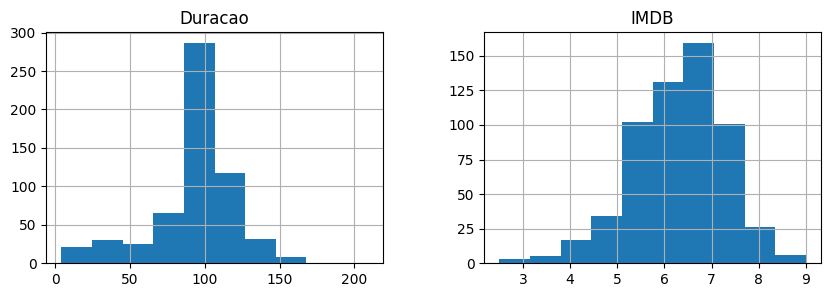

In [10]:
# Histograma
ds.hist(figsize = (10,3))
plt.show()

O gráfico mostra que as variáveis IMDB e Duracao apresentam um comportamento aproximado de uma curva normal.

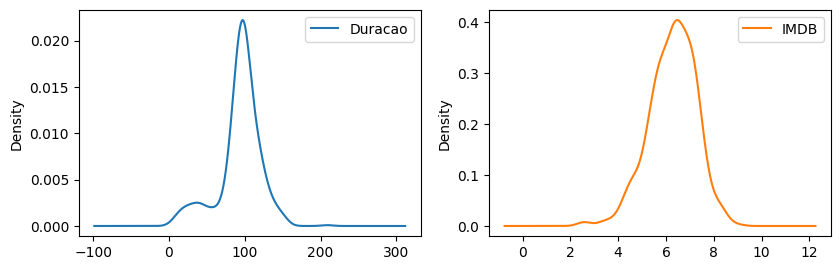

In [11]:
# Density Plot
ds.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Existe moda única para ambas variáveis, sem skew

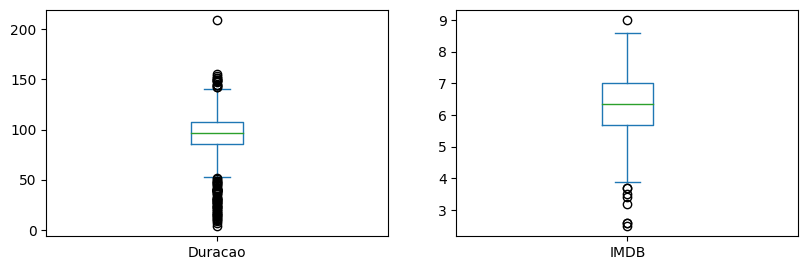

In [12]:
# Boxplot
ds.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Outliers presentes em ambas variáveis

---


**Percepções da análise estatística Visual:**


*   Os graficos de histograma e densidade mostram as variáveis IMDB e Duracao apresentando um comportamento aproximado de uma curva normal. 
*   O gráfico boxplot mostra a existencia de outliers em ambas variáveis.
*   O gráfico de densidade mostra ainda apenas uma moda para cada variável e, também não apresentam *skew*, o que sugere que o valor da mediana é próximo a média, apesar dos outliers presentes.
*   A média do tempo de duração está na ordem dos 90 minutos (93,6) e o desvio-padrão em quase 30 minutos (27,8).






---

### *Determinado* os Outliers** (REVER)**

imdb_outlier_count: 9


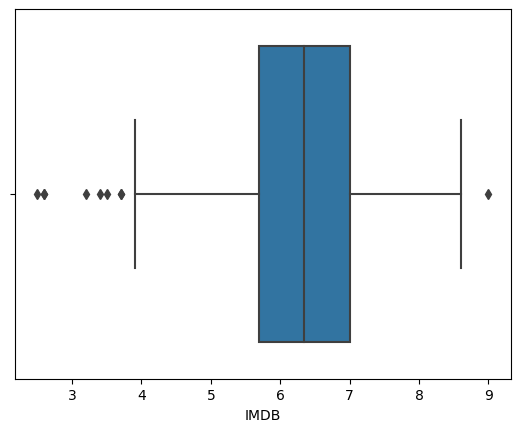

In [13]:
 #interquartile range will be used
imdb_q1 = ds["IMDB"].quantile(0.25) #first quartile
imdb_q3 = ds["IMDB"].quantile(0.75) #third quartile

imdb_iqr = imdb_q3-imdb_q1

imdb_up = imdb_q3 + 1.5 * imdb_iqr #upper limit
imdb_low = imdb_q1 - 1.5 * imdb_iqr #lower limit

outlier_imdb = ds[(ds["IMDB"] < imdb_low) | (ds["IMDB"] > imdb_up)]
count_imdb = outlier_imdb.count()["IMDB"]

print(f"imdb_outlier_count: {count_imdb}")

sns.boxplot(x = ds['IMDB'])
plt.show()

### 3.3. Visualizações Multimodais
Nesta etapa objetivo é de buscar uma correlação entre as variáveis numéricas preditoras com a variável alvo IMDB. 


Será observado também se existe alguma possivel característica na distribuição das variáveis.

Medindo a correlação e avaliando a dispersão entre as variaveis

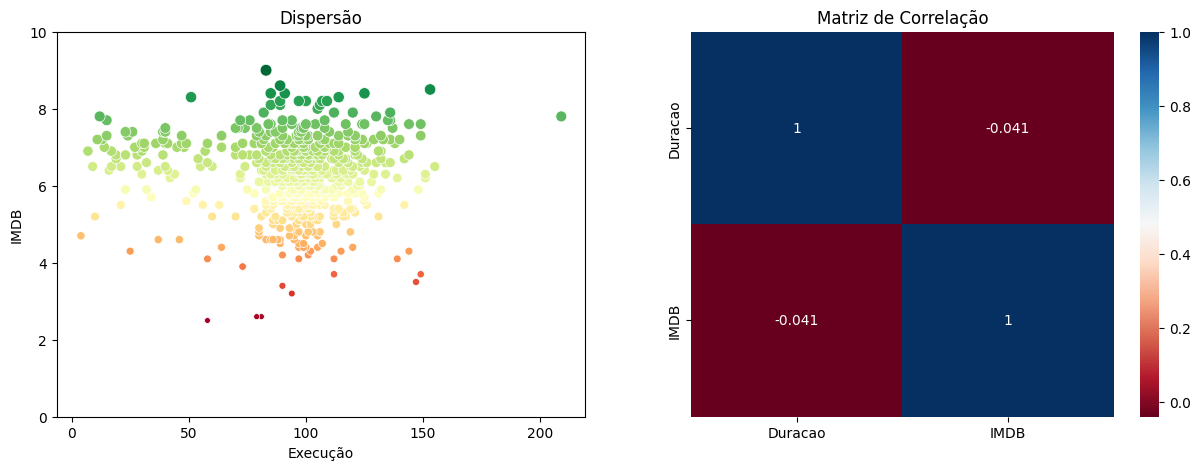

In [14]:
plt.figure(figsize= (15, 5))

#grafico de dispersão entre as variaveis IMDB  e Duração
plt.subplot(1, 2, 1)

ax = sns.scatterplot(data= ds, 
                x= 'Duracao', 
                y= 'IMDB', 
                hue= 'IMDB', 
                size= 'IMDB',
                palette= 'RdYlGn',
                legend= False)

ax.set_ylim((0, 10))
plt.title('Dispersão', size= 12)
plt.xlabel('Execução', size= 10)
plt.ylabel('IMDB', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)

# Matriz de Correlação entre as variaveis IMDB Score e Runtime
plt.subplot(1, 2, 2)

plt.title('Matriz de Correlação', size= 12)
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');

#sns.histplot(ds['Runtime'])
#plt.title('Runtime Distribuition', size= 20)
#plt.xlabel('Runtime', size= 17)
#plt.yticks(size= 15)
#plt.xticks(size= 15)

plt.show()


---


**Percepção da análise Multimodal de correlação e dispersão **

*  Não há correlação aparente entre o tempo de exibição (Duracao) e a avaliação obtida (IMDB)
*   Aparentemente as maiores notas IMDB se situam em volta da média de duração (90) com até um desvio padrão de distancia (30)
*   Um outro achado é que aparentemente os filmes com menor tempo de duração tem uma classificação alta.







---





---

**Análise de correlação das demais variáveis preditoras com variavel alvo IMDB**

Para completar a análise de correlação, existem ainda 2 perguntas a serem respondidas:
1. Existe uma correlação entre a linguagem utilizada no filme e a nota obtida?
2. Existe uma correlação entre a gênero do filme e a nota obtida?

Para respondê-las, será necessário uma transformação categórica nas variaveis preditoras Linguagem e Gênero

Iniciando a transformação das variaveis do tipo objeto (não numéricas) em valores numericos para análise de correlação

In [15]:
# RETIRAR *******
ds.values[:10,1:6]

array([['Documentary', 'August 5, 2019', 58, 2.5, 'English/Japanese'],
       ['Thriller', 'August 21, 2020', 81, 2.6, 'Spanish'],
       ['Science fiction/Drama', 'December 26, 2019', 79, 2.6, 'Italian'],
       ['Horror thriller', 'January 19, 2018', 94, 3.2, 'English'],
       ['Mystery', 'October 30, 2020', 90, 3.4, 'Hindi'],
       ['Action', 'November 1, 2019', 147, 3.5, 'Hindi'],
       ['Comedy', 'December 4, 2020', 112, 3.7, 'Turkish'],
       ['Heist film/Thriller', 'June 5, 2020', 149, 3.7, 'English'],
       ['Musical/Western/Fantasy', 'March 23, 2018', 73, 3.9, 'English'],
       ['Comedy', 'May 18, 2021', 139, 4.1, 'Hindi']], dtype=object)

In [16]:
# categorizando os dados não numericos
x = ds.values[:,1:6]
#y = ds.values[:, 4]

# ordinal encoding para os atributos x
encoded_X = OrdinalEncoder().fit_transform(x)

# exibindo amostra dos dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas
ds.columns[1:6]

Atributos transformados:
[[ 45.  58.  42.   0.   6.]
 [106.  47.  56.   1.  29.]
 [ 93.  85.  54.   1.  20.]
 [ 63. 138.  69.   2.   2.]
 [ 73. 342.  65.   3.  18.]]


Index(['Genero', 'Premiere', 'Duracao', 'IMDB', 'Linguagem'], dtype='object')

In [17]:
# convertendo Array em dataset para uso dos gráficos
dsCategorizado = pd.DataFrame(encoded_X)
dsCategorizado.columns=ds.columns[1:6]
dsCategorizado.head(10) # Apresenta 10 primeiras linhas


,Genero,Premiere,Duracao,IMDB,Linguagem
0,45.0,58.0,42.0,0.0,6.0
1,106.0,47.0,56.0,1.0,29.0
2,93.0,85.0,54.0,1.0,20.0
3,63.0,138.0,69.0,2.0,2.0
4,73.0,342.0,65.0,3.0,18.0
5,0.0,275.0,117.0,4.0,18.0
6,32.0,93.0,87.0,5.0,37.0
7,56.0,202.0,119.0,5.0,2.0
8,72.0,220.0,49.0,6.0,2.0
9,32.0,251.0,113.0,7.0,18.0


In [18]:
# Checando se a categorização foi bem sucedida, comparando valores das 10 primieras linhas
ds.head(10)

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


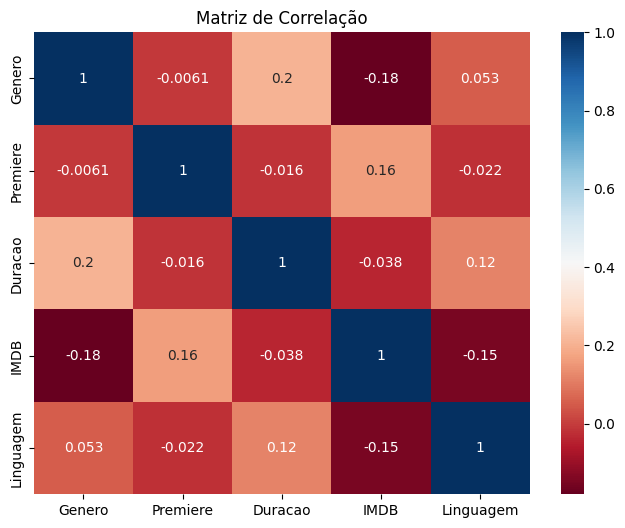

In [19]:
# Gerando a Matriz de Correlação
plt.figure(figsize= (8, 6))
plt.title('Matriz de Correlação', size= 12)
sns.heatmap(dsCategorizado.corr(), annot=True, cmap='RdBu');


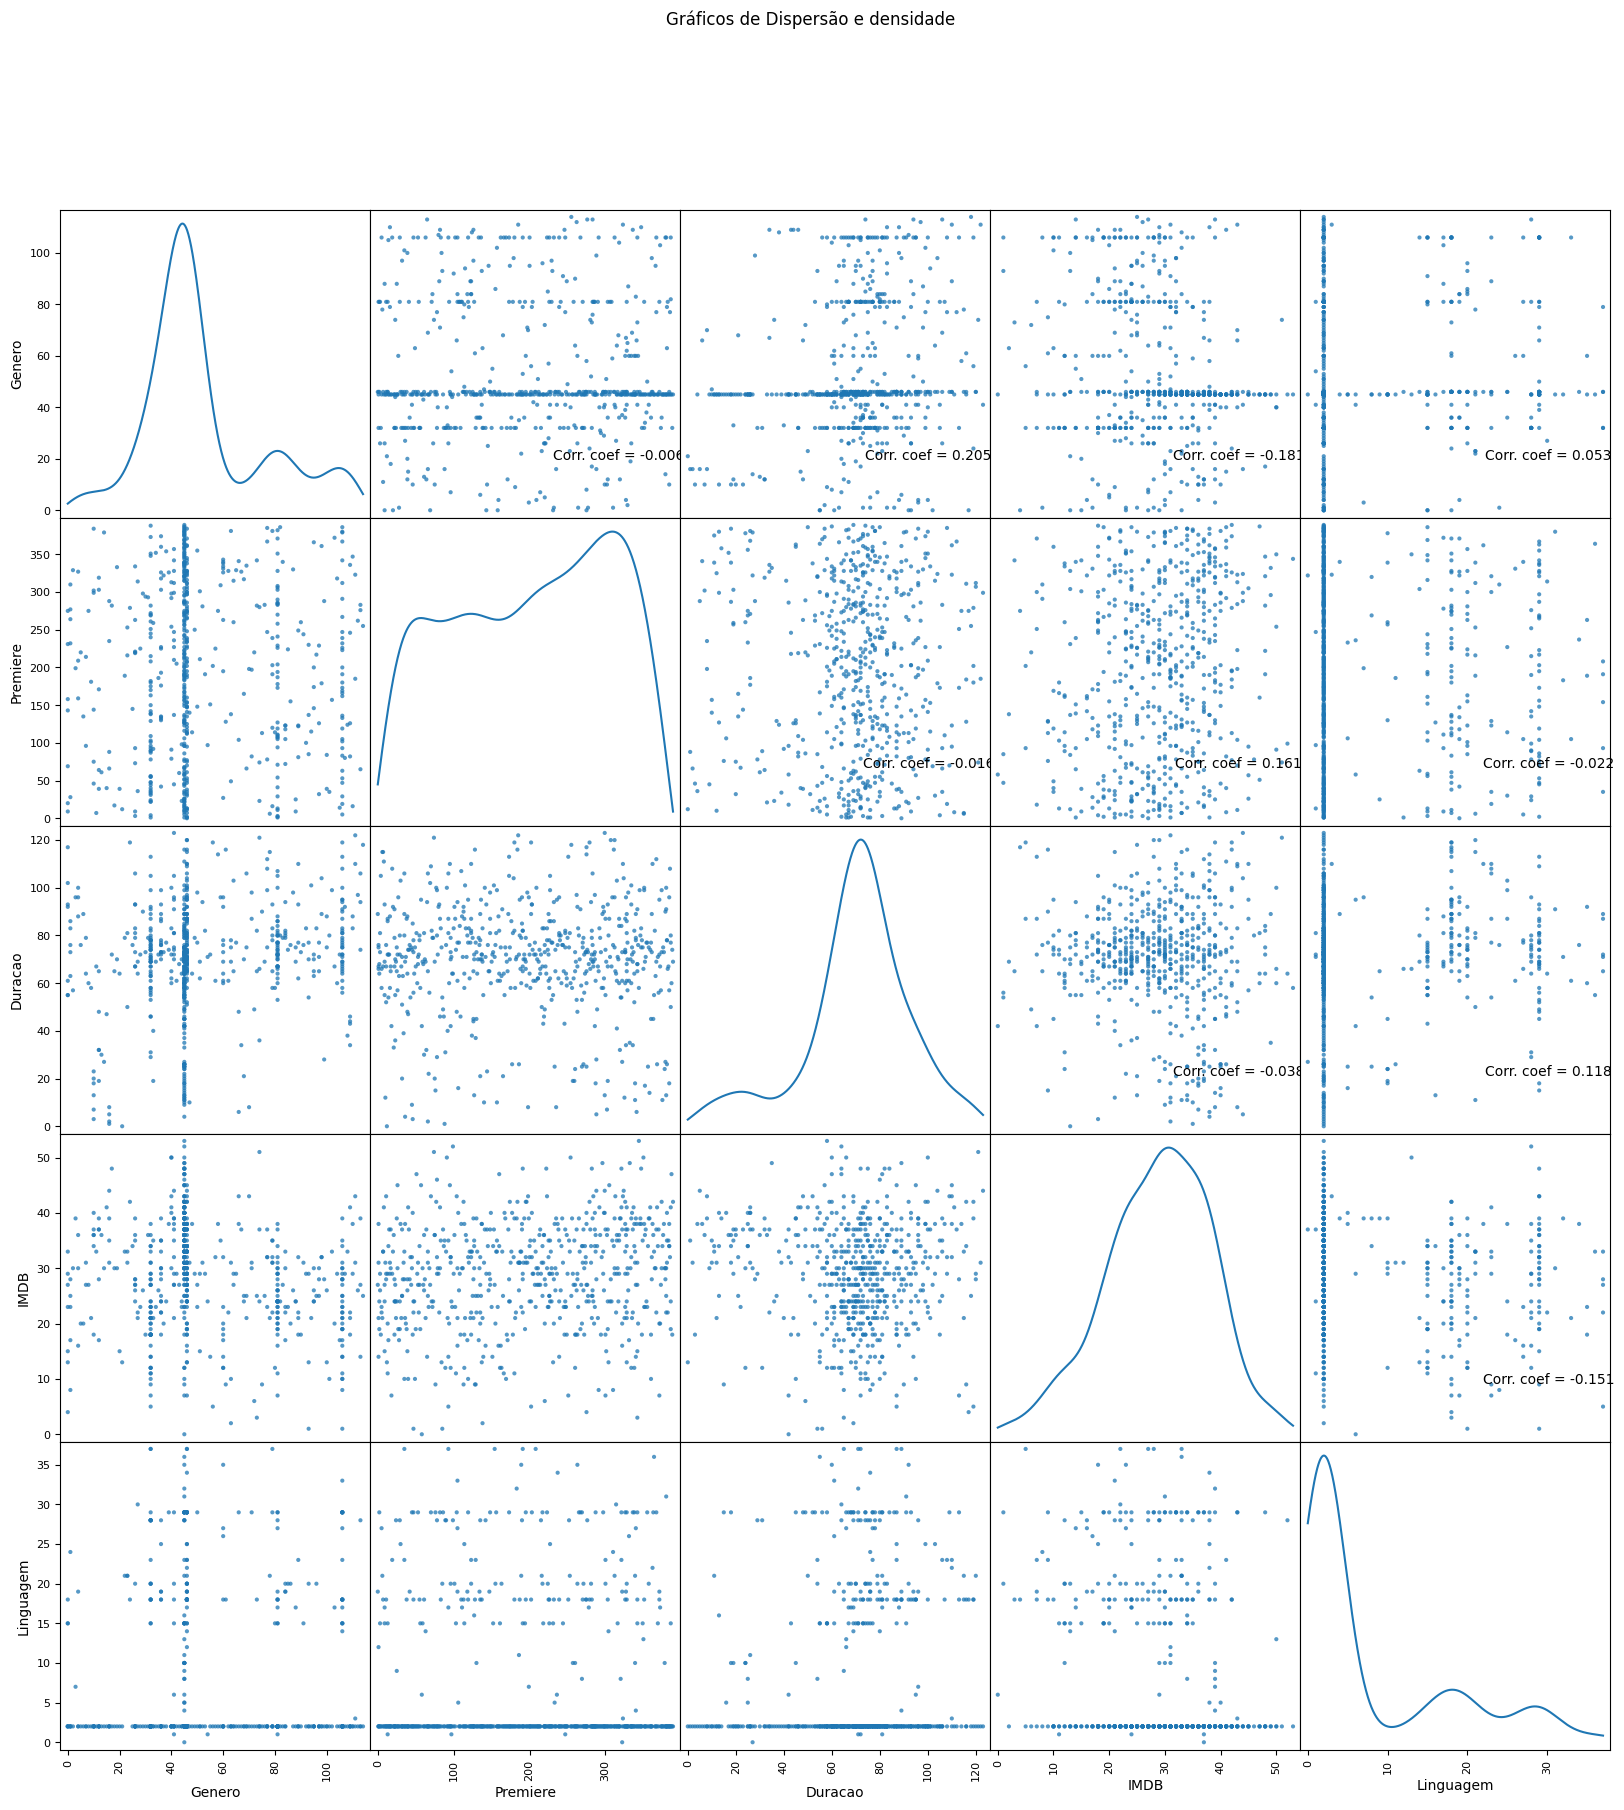

In [20]:
# Apresentando gráficos de dispersão destas variaveis categorizadas 
plotScatterMatrix(dsCategorizado, 20, 10)

---

**Resultado da Análise de correlação das variáveis preditoras Linguagem e Gênero com variavel alvo IMDB**

1. Existe uma correlação entre a linguagem utilizada no filme e a nota obtida?

  Não há correlação 
2. Existe uma correlação entre a gênero do filme e a nota obtida?

  Não há correlação 




---
**Demais Visualizações **


A ideia aqui é analisar o comportamento das variaveis Premiere, Linguagem e genero com relação ao score IMDB.

Para uma análise do possivel efeito da variavel object Premiere na avaliação (IMDB) é interessante desmembrá-la  em novas variáveis numéricas: Ano, mes e dia da semana.

In [21]:
# Desmembrando Premiere em Ano, mes e dia da semana
ds['Data'] = pd.to_datetime(ds.Premiere)
ds['DiaSemana'] = ds['Data'].dt.day_of_week 
ds['Mes'] = ds['Data'].dt.month
ds['Ano'] = ds['Data'].dt.year 

# Conferindo a tabela - Mostrando 5 linhas com novas variáveis
ds.head()

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem,Data,DiaSemana,Mes,Ano
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,4,10,2020


In [22]:
# Mostrando as novas informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Titulo     584 non-null    object        
 1   Genero     584 non-null    object        
 2   Premiere   584 non-null    object        
 3   Duracao    584 non-null    int64         
 4   IMDB       584 non-null    float64       
 5   Linguagem  584 non-null    object        
 6   Data       584 non-null    datetime64[ns]
 7   DiaSemana  584 non-null    int64         
 8   Mes        584 non-null    int64         
 9   Ano        584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 45.8+ KB
None


**i. Relação entre a Data do lançamento (Premiere) e a avaliação (IMDB) obtida.**

Nesta próxima etapa da análise, será avaliada a relação entre a data de lancamento e a sua avaliação obtida. Para isto as questões a responder aqui serão:

1. Em que ano houve um maior lançamentos de filmes originais?

2. Em qual mes houve maior número de lançamentos de filmes originais?

3. Qual dia de semana há uma preferencia por lançamentos?

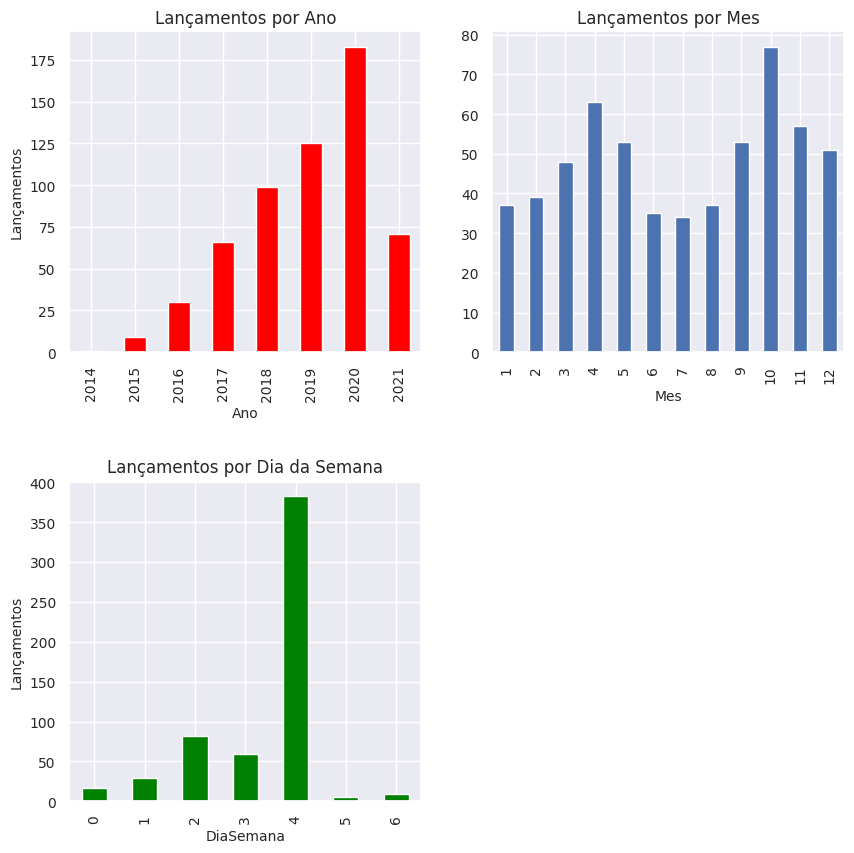

In [67]:
# preparando os gráficos
plt.figure(figsize= (10, 10))

# gráfico de quantidade por ano
plt.subplot(2, 2, 1)
plt.title('Lançamentos por Ano', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('ano', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Ano")["Titulo"].count().plot(kind = "bar", color='red')

# gráfico de quantidade por mes
plt.subplot(2, 2, 2)
plt.title('Lançamentos por Mes', size= 12)
#plt.ylabel('Lançamentos', size= 10)
plt.xlabel('mes', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Mes")["Titulo"].count().plot(kind = "bar")

# gráfico de quantidade por dia de semana
plt.subplot(2, 2, 3)
plt.title('Lançamentos por Dia da Semana', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('Dia da Semana', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
#label_diasem = ['domingo','2af','3af','4af','5af','6af','sábado']
ds.groupby("DiaSemana")["Titulo"].count().plot(kind = "bar", color='green')

# apresntando os gráficos
plt.subplots_adjust(hspace=0.4);
plt.show()



---

**Respostas as perguntas:**
1. Em que ano houve um maior lançamentos de filmes originais?

  R: O ano com maior número de lançamentos no periodo avaliado foi 2020 no periodo estudado 

2. Em qual mes do ano ocorre um maior número de lançamentos de filmes originais?

  R: Existe uma tendencia de lançamentos nos meses de abril e outubro no periodo estudado 

3. Qual dia de semana há uma preferencia por lançamentos?

  R: Existe uma tendencia de lançamentos na 4a feira no periodo estudado 

**Outras Conclusões e Percepções**

* Observa-se uma tendência quase linear de aumento de lançamentos de originais, que foi quebrada em 2021, provavelmente devido a pandemia, que ocasionou atrasos e adiamentos de novas produções




---



**Definindo funções**

Com intuito de tornar a análise mais limpa, defini a função de impressão abaixo que será usada nas próximas análises gráficas

In [99]:
# Função para impressão dos gráficos
def imprime2graficos (var1, linhas):

# Mostra top generos avaliados definido por parametro "linhas"
  plt.figure(figsize=(10,15))
  sns.set(style="darkgrid")

  avg_rating_df = ds.groupby([var1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_df = ds.groupby([var1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top_df = top_df[0:linhas]
  avg_rating_df = avg_rating_df[(avg_rating_df[var1].isin(top_df[var1]) == True)]

  fig, (ax1, ax2) = plt.subplots(2,1)

# 1o gráfico
  ax1.set_title('Média das Avaliações de filmes por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax1.set_xlabel('IMDB', fontsize = 10)
  #ax1.set_ylabel('Genero')
  #ax1.set_xticklabels(ax1.get_xticklabels(), , rotation=90, ha="right")

  sns.barplot(x = 'IMDB', y = var1, data = avg_rating_df, ax=ax1)

# 2o gráfico
  ax2.set_title('Média dos Lançamentos de filmes por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax2.set_xlabel('Lançamentos', fontsize = 10)
#ax2.set_ylabel(var1)
  sns.barplot(x = 'Titulo', y = var1, data = top_df, ax = ax2)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
  plt.subplots_adjust(hspace=0.6);
  plt.show()

# Função para impressão das tabelas que alimentas os graficos
def imprime2tabelas(atr1, linhas):
  avg_rating_df = ds.groupby([atr1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top15_df = ds.groupby([atr1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top15_df = top15_df[0:linhas]
  display(top15_df)
  
  print(f'\n')

  avg_rating_df = avg_rating_df[(avg_rating_df[atr1].isin(top15_df[atr1]) == True)]
  display(avg_rating_df)

**ii. Variável Gênero**

1. Quais gêneros de filmes foram os mais lançados?
2. Quais gêneros de filmes tem melhor avaliação?

<Figure size 1000x1500 with 0 Axes>

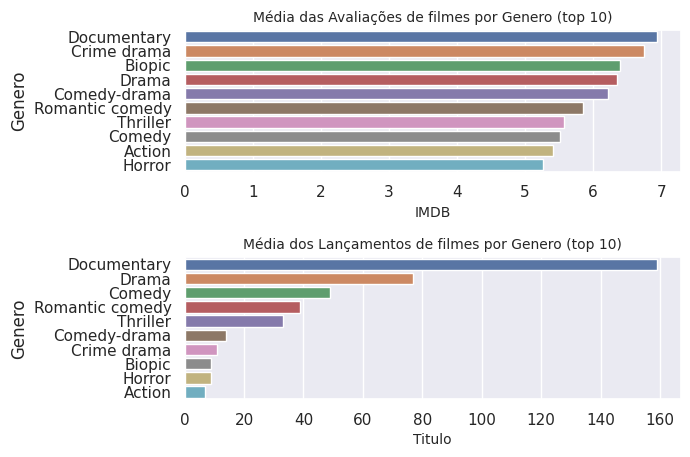

In [100]:
# analisa Genero x IMDB
imprime2graficos('Genero',10)

In [ ]:
imprime2tabelas('Genero',10)



---

**Respostas as perguntas:**
1. Quais gêneros de filmes forma os mais lançados?
  
  R:
2. Quais gêneros de filmes tem melhor avaliação?
  
  R: 
**Outras Conclusões e Percepções**

* Observa-se XXXXXXXX




---


**iii. Variável Linguagem**

1. Quais linguagens mais lançadas?
2. Quais Linguagens tem melhor avaliação?

<Figure size 1000x1500 with 0 Axes>

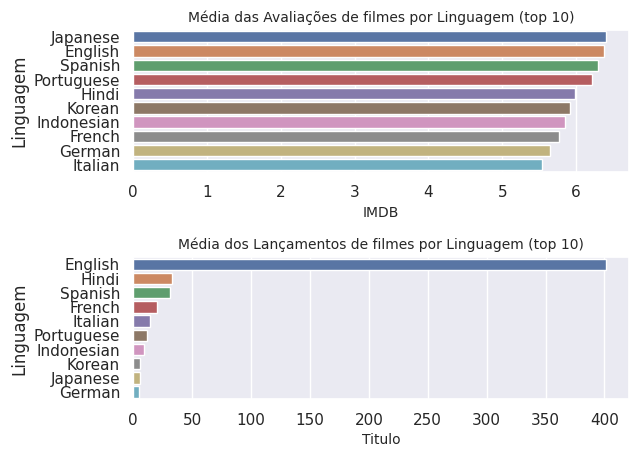

In [103]:
# analisa Linguagem  x IMDB
imprime2graficos('Linguagem', 10)



---


---


**TESTES TESTES TEWSTES**
******************************

**ii. Relação entre a Linguagem e a avaliação (IMDB) obtida.**

Nesta próxima etapa da análise, será avaliada a relação entre linguagem usada no filme e a sua avaliação obtida. 

Para isto as questões a responder aqui serão:

1. Existe uma relação entre a linguagem utilizada e a nota obtida?

In [ ]:
#Criando um dataframe ordenado por genre
ds_genre = pd.DataFrame(columns= ['Genre', 'Title', 'Premiere', 'Runtime', 'Score', 'Language', 'Ano', 'Mes', 'DiaSemana'])

i = 0
genres_list = []
for row in ds['Genero']:
    genres = row.replace('/ ','/').replace(' /', '/').replace(' / ', '/').replace('-', '/').replace(' ', '/').split('/')
    
    for genre in genres:
        new_row ={
            'Genre'    : genre.title(),
            'Title'    : ds['Titulo'][i],
            'Premiere' : ds['Premiere'][i],
            'Runtime'  : ds['Duracao'][i],
            'Score'    : ds['IMDB'][i],
            'Language' : ds['Linguagem'][i],
            'Ano'      : ds['Ano'][i],
            'Mes'      : ds['Mes'][i],
            'DiaSemana': ds['DiaSemana'][i]
        }
        ds_genre = ds_genre.append(new_row, ignore_index= True)
    i += 1

ValueError: ignored

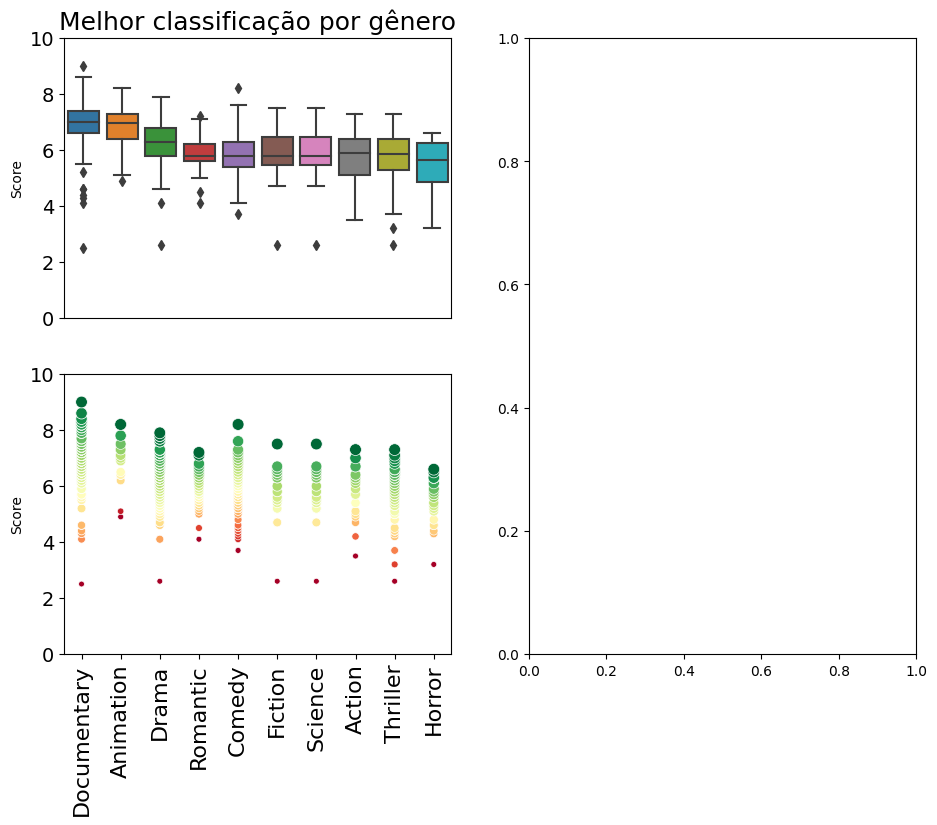

In [ ]:
plt.figure(figsize= (11,8), )

top_genres = ds_genre.loc[ds_genre['Genre'].isin(ds_genre.groupby('Genre').sum().sort_values('Score', ascending= False).reset_index()['Genre'][:10])].groupby('Genre').mean().sort_values('Score', ascending= False).reset_index()['Genre']

plt.subplot(2, 2, 1)
sns.boxplot(data= ds_genre, 
            x= 'Genre', 
            y= 'Score', 
            order= top_genres)
plt.title('Melhor classificação por gênero', size= 18)
plt.xlabel(None)
plt.xticks([])
plt.yticks(size= 14)
plt.ylim((0, 10))

plt.subplot(2, 2, 3)
for genre in top_genres:
    sns.scatterplot(data= ds_genre.loc[ds_genre['Genre'] == genre],
                   x= 'Genre',
                   y= 'Score',
                   hue= 'Score',
                   size= 'Score',
                   palette= 'RdYlGn',
                   legend= False)
plt.xlabel(None)
plt.xticks(rotation= 90,size= 16)
plt.yticks(size= 14)
plt.ylim((0, 10))


plt.subplot(1, 2, 2)
sns.countplot(ds_genre.loc[ds_genre['Genre'].isin(top_genres)]['Genre'], order= top_genres)
plt.title('Released Originals per Genre', size= 22)
plt.xticks(rotation= 90, size= 16)
plt.yticks(size= 14)
plt.xlabel(None)

plt.show()

In [ ]:
# IMDB medio das Linguagens  produzidas
ds_grouped_lang = ds.groupby(by="Language")["IMDB Score"].mean().plot(kind = "bar")

**4. Quais gêneros tiveram a maior avaliação?**

In [ ]:
sum_lang = ds.groupby("Language").agg({"IMDB Score" : "mean"})
#sum_lang.plot(kind="bar")
num_lang = ds.groupby("Language").count()
sum_lang.barh(num_lang)
min_score = sum_runtime["IMDB Score"].min()

In [ ]:

ds_lang = ds.groupby("Language").agg({"IMDB Score" : "mean"})
ds_lang_ordem = ds_lang.sort_values(['IMDB Score'], ascending = False)
sum_lang.plot(kind="bar")
#max_score = sum_lang["IMDB Score"].max()

In [ ]:
# Define paleta de cores

# Definição de cores utilizando palette viridis 
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
#display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
#display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

In [ ]:
# define uma cor default **********************
corDefault = coresViridis[1]

# Prepara a figura (fig) e a área do gráfico (ax) com largura 12 e altura 8 (em polegadas)
fig, ax = plt.subplots(figsize = (12, 8))

# Plota o gráfico de barras
b1 = ax.barh(y = ds['Language'], width = ds.groupby("Language").agg({"IMDB Score" : "mean"}), color = corDefault)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-horiz.pdf")
plt.savefig("barras-horiz.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-horiz.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

**2. Em que linguagem  os filmes apresentam as menores avaliaçoes (IMDB Score)?**

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook.

### 4.1. Tratamento de Missings e Limpeza

Avaliando a ocorrencia de nulls e/ou linhas duplicadas, verificando agora a quantidade de linhas preenchidas por coluna, número de valores nulls e ocorrencia de duplicidad

In [ ]:
# exibindo a quantidade de linhas por coluna
print(f'\n*** Quantidade de linhas por coluna ***')
print(ds.count())

# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Quantidade de linhas por coluna ***
Title         584
Genre         584
Premiere      584
Runtime       584
IMDB Score    584
Language      584
dtype: int64

*** Valores Nulos ***
Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

*** Linhas duplicadas ***
0


Certificando visualmente atraves de grafico a ocorrencia de Missings



<Axes: >

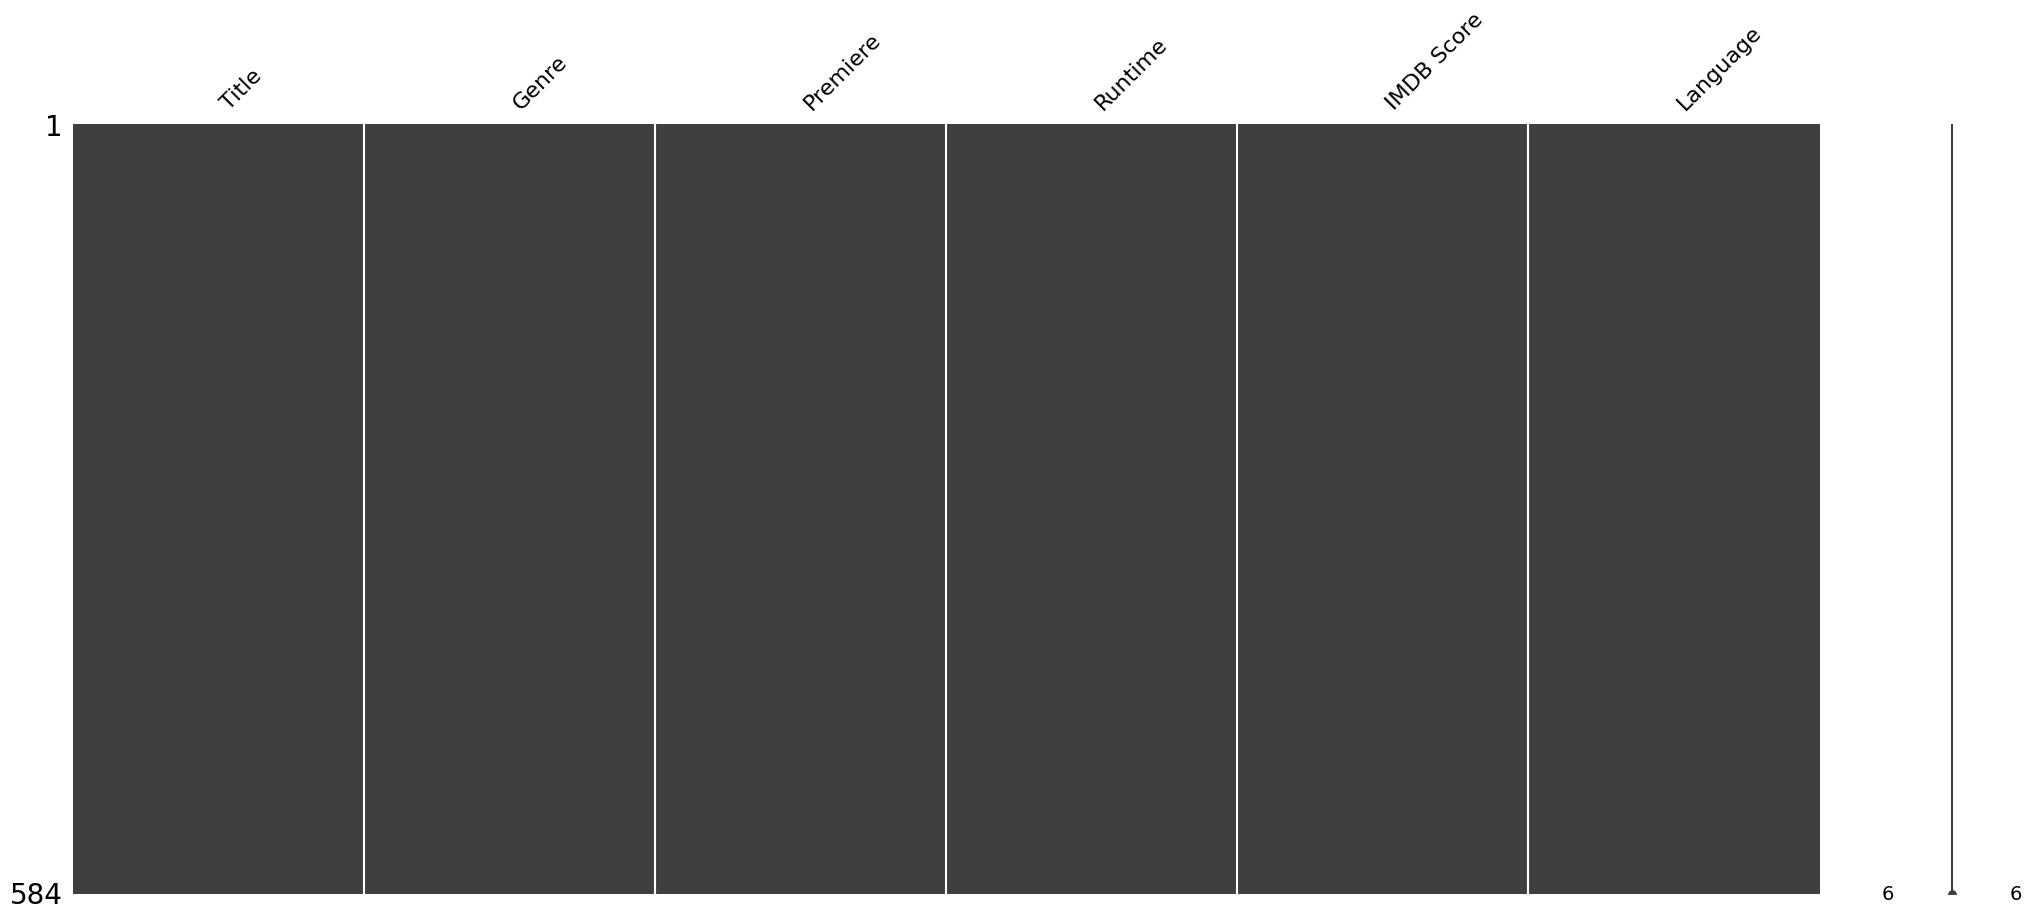

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
#col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
#dsNoMiss = ds[col[:]]

# substituindo os zeros por NaN
#dsNoMiss.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds)



---


**Resumo da análise de Missing e duplicatas**

*   Não há valor nulo no conjunto de dados.
*   Não há variáveis duplicadas


---



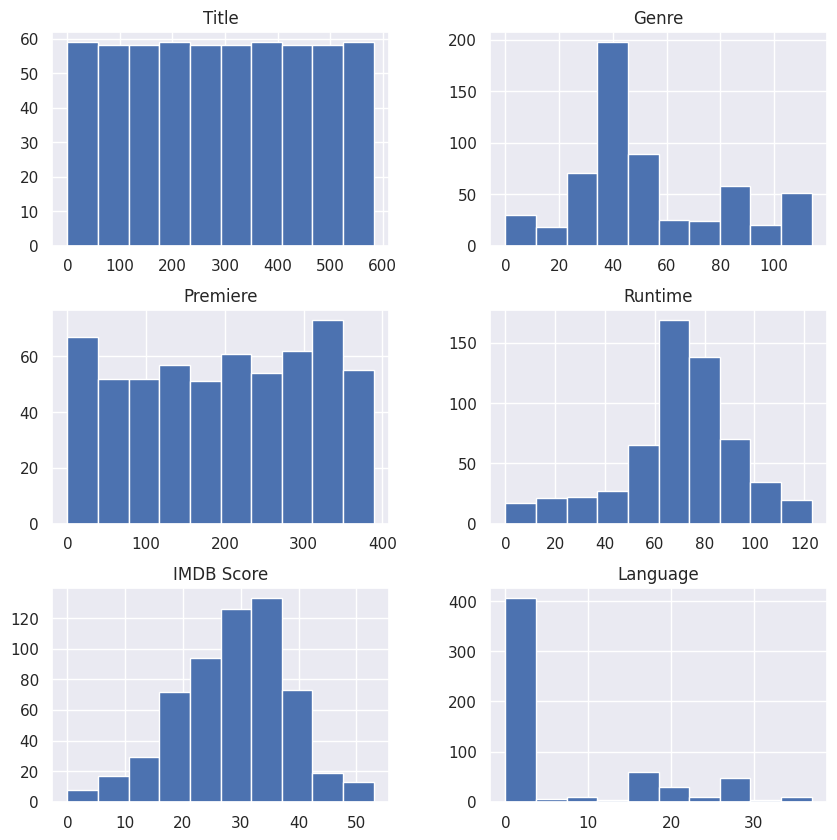

In [ ]:
# Gerando Histogramas
dsCategorizado.hist(figsize = (10,10))
plt.show()

 4.4 Visualização Multimodal dos Dados Categorizados


In [ ]:
# Converted panda Series type of column "Premiere" to date format
ds["Date"] = pd.to_datetime(ds.Premiere)

# Created a column representing days called "Day"
ds['Day'] = ds['Date'].dt.day_of_week 

# Created a column representing months called "Month"
ds['Month'] = ds['Date'].dt.month

# Created a column representing years called "Year"
ds['Year'] = ds['Date'].dt.year 

# Removed the "Premiere" column which is no longer needed.
ds.drop("Premiere", axis=1, inplace=True)

# Previewing first 10 rows after the changes
ds.head(10)

In [ ]:
# exibindo um sumário estatístico
display(ds.describe())

In [ ]:
# Histograma
ds.hist(figsize = (10,10))
plt.show()

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');

***REVER GRAFICOS ABAIXO***

In [ ]:
dsCategorizado.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

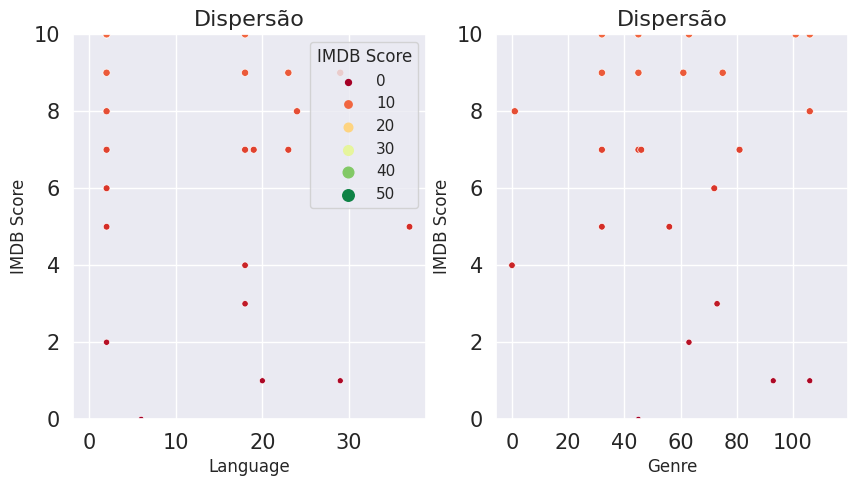

In [ ]:
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(data= dsCategorizado, 
                x= 'Language', 
                y= 'IMDB Score', 
                hue= 'IMDB Score', 
                size= 'IMDB Score',
                palette= 'RdYlGn',
                legend= True)

ax.set_ylim((0, 10))
plt.title('Dispersão', size= 16)
plt.xlabel('Language', size= 12)
plt.ylabel('IMDB Score', size= 12)
plt.yticks(size= 15)
plt.xticks(size= 15)

plt.subplot(1, 2, 2)
ax = sns.scatterplot(data= dsCategorizado, 
                x= 'Genre', 
                y= 'IMDB Score', 
                hue= 'IMDB Score', 
                size= 'IMDB Score',
                palette= 'RdYlGn',
                legend= False)
ax.set_ylim((0, 10))
plt.title('Dispersão', size= 16)
plt.xlabel('Genre', size= 12)
plt.ylabel('IMDB Score', size= 12)
plt.yticks(size= 15)
plt.xticks(size= 15)




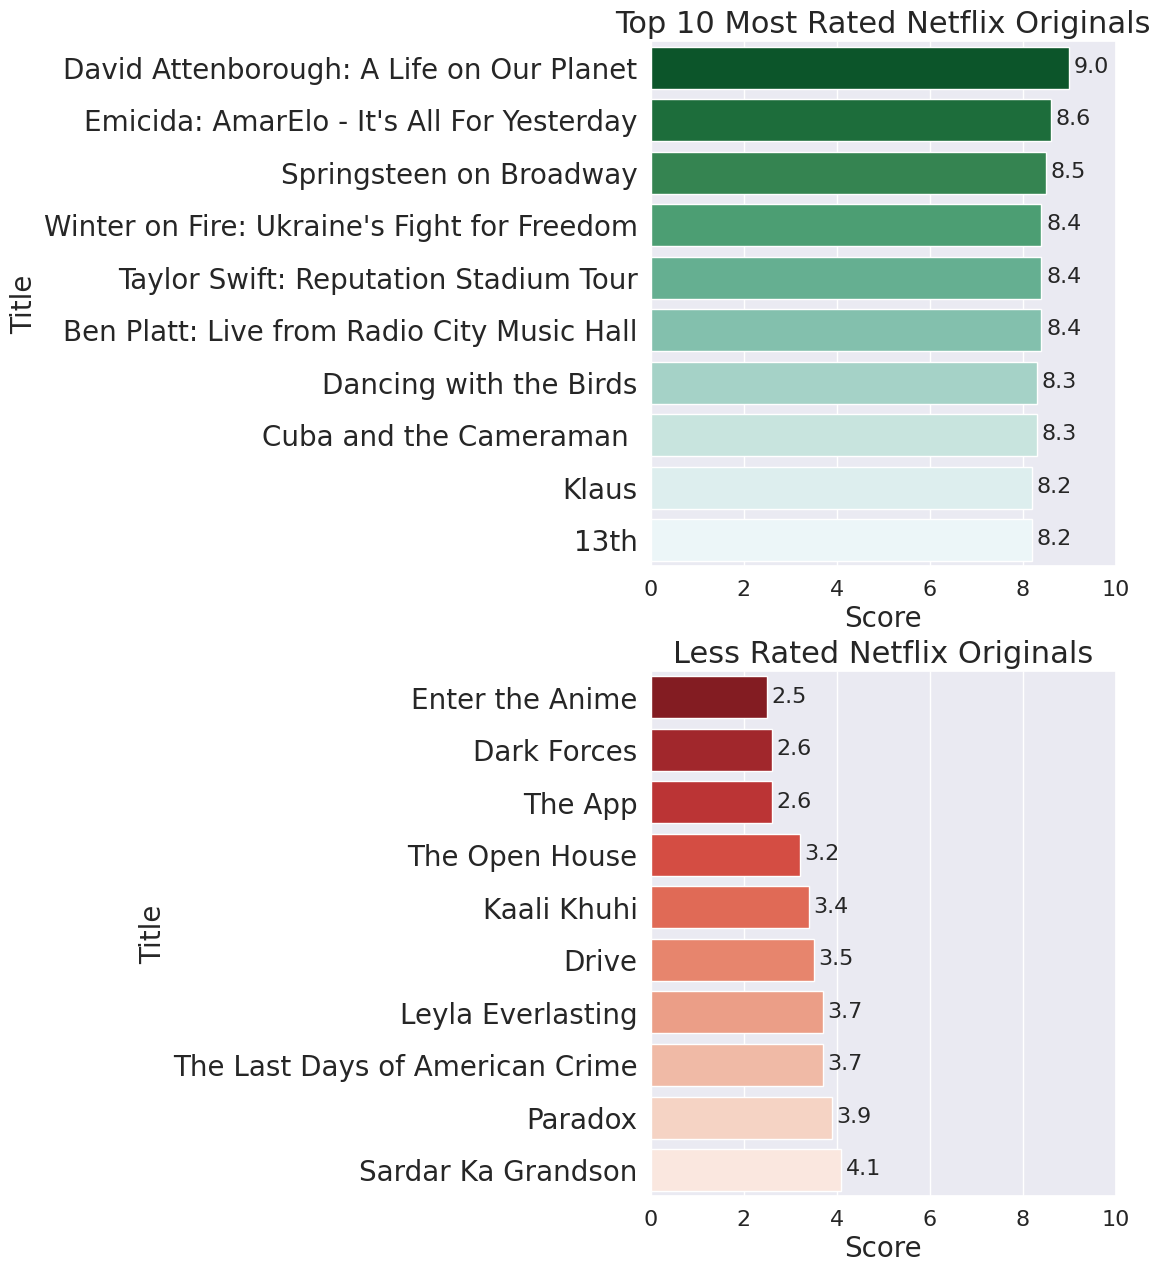

In [ ]:
data = ds.sort_values('IMDB Score', ascending= False)[:10]


plt.figure(figsize= (6, 15))
sns.set_theme()

plt.subplot(2, 1, 1)
ax = sns.barplot(data= data, 
                 x= 'IMDB Score', 
                 y= 'Title', 
                 palette= 'BuGn_r', )

ax.set_xlim(0, 10)
plt.title('Top 10 Most Rated Netflix Originals', size= 22)
plt.xlabel('Score', size= 20)
plt.ylabel('Title', size= 20)
plt.xticks(size= 16)
plt.yticks(size= 20)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_height()
    y = patch.get_y()
    
    plt.text(x + width - 0.7, y + 0.5, '{}'.format(width), size= 16)

    
data = ds.sort_values('IMDB Score')[:10]

plt.subplot(2, 1, 2)
ax = sns.barplot(data= data, 
                 x= 'IMDB Score', 
                 y= 'Title', 
                 palette= 'Reds_r', )

ax.set_xlim(0, 10)
plt.title('Less Rated Netflix Originals', size= 22)
plt.xlabel('Score', size= 20)
plt.ylabel('Title', size= 20)
plt.xticks(size= 16)
plt.yticks(size= 20)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_height()
    y = patch.get_y()
    
    plt.text(x + width - 0.7, y + 0.5, '{}'.format(width), size= 16)

SEM CORRELAÇÂO

---



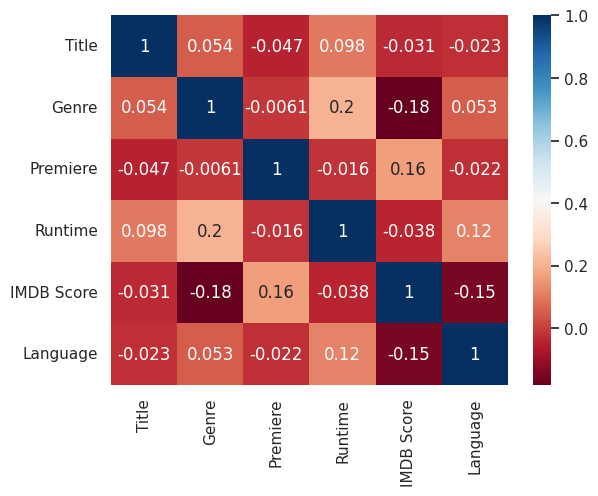

In [ ]:
# Matriz de Correlação das categorias convertidas
sns.heatmap(dsCategorizado.corr(), annot=True, cmap='RdBu');